In [225]:
import os, sys, pandas as pd, numpy as np
from datetime import datetime

# Where my notebook is running
print("CWD:", os.getcwd())

# Base folders 
BASE = ".."
BLUESKY_DIR = os.path.join(BASE, "initial_data_analysis")
STOCK_DIR   = os.path.join(BASE, "data_aquisition")

print("\nInitial data analysis folder:")
print(BLUESKY_DIR, "\n", os.listdir(BLUESKY_DIR))

print("\nStock (acquisition) folder:")
print(STOCK_DIR, "\n", os.listdir(STOCK_DIR))


CWD: /Users/lamin/Documents/fall-2025-financial-markets-and-sentiment/notebooks

Initial data analysis folder:
../initial_data_analysis 
 ['musk_vs_stocks.ipynb', 'MB_visualizations.ipynb', 'bluesky_allkeywords.csv', 'bluesky_stock_merged_final.csv', 'bluesky_merged_mentions.csv', 'bluesky_ceo_counts_matrix_20240801-20250731.csv', 'bluesky_stock_merged.csv', 'all_musk_posts.csv', 'initial_formatting.ipynb', 'bluesky_ticker.csv']

Stock (acquisition) folder:
../data_aquisition 
 ['bluesky.ipynb', 'stockdata.ipynb', 'bluesky_allkeywords.csv', 'clean_stock_data.csv', '.ipynb_checkpoints', 'bluesky_ticker.csv']


In [226]:

# Helper function to summarize  CSV quickly

import pandas as pd

def summarize_csv(path, parse_dates_guess=("date","Date","DATE")):
    print("—"*80)
    print("FILE:", path)
    df = pd.read_csv(path)
    # standardize column names (just for display)
    cols_std = [c.strip() for c in df.columns]
    df.columns = cols_std
    print("Shape:", df.shape)
    print("Columns:", list(df.columns))

    # trying to parse a likely date column (non-destructive)
    date_col = next((c for c in parse_dates_guess if c in df.columns), None)
    if date_col:
        try:
            dts = pd.to_datetime(df[date_col], errors="coerce")
            print(f"Date col detected: '{date_col}' | min:", dts.min(), "| max:", dts.max())
            print("Rows with invalid dates:", dts.isna().sum())
        except Exception as e:
            print(f"(Could not parse '{date_col}' as dates: {e})")
    else:
        print("No obvious date column found.")

    # missing values summary
    na = df.isna().sum()
    if na.sum() > 0:
        print("\nMissing values (top 10):")
        print(na[na>0].sort_values(ascending=False).head(10))
    else:
        print("\nNo missing values detected.")

    # quick preview
    print("\nHead:")
    display(df.head(5))
    return df


In [228]:
# Inspecting each Bluesky dataset
allkw_path = os.path.join(BLUESKY_DIR, "bluesky_allkeywords.csv")
ticker_path = os.path.join(BLUESKY_DIR, "bluesky_ticker.csv")
ceo_path = os.path.join(BLUESKY_DIR, "bluesky_ceo_counts_matrix_20240801-20250731.csv")  
# Summarize datasets
allkw_df = summarize_csv(allkw_path)
ticker_df = summarize_csv(ticker_path)
ceo_df = summarize_csv(ceo_path)


————————————————————————————————————————————————————————————————————————————————
FILE: ../initial_data_analysis/bluesky_allkeywords.csv
Shape: (50, 365)
Columns: ['company', '2024-08-01', '2024-08-02', '2024-08-03', '2024-08-04', '2024-08-05', '2024-08-06', '2024-08-07', '2024-08-08', '2024-08-09', '2024-08-10', '2024-08-11', '2024-08-12', '2024-08-13', '2024-08-14', '2024-08-15', '2024-08-16', '2024-08-17', '2024-08-18', '2024-08-19', '2024-08-20', '2024-08-21', '2024-08-22', '2024-08-23', '2024-08-24', '2024-08-25', '2024-08-26', '2024-08-27', '2024-08-28', '2024-08-29', '2024-08-30', '2024-08-31', '2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04', '2024-09-05', '2024-09-06', '2024-09-07', '2024-09-08', '2024-09-09', '2024-09-10', '2024-09-11', '2024-09-12', '2024-09-13', '2024-09-14', '2024-09-15', '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19', '2024-09-20', '2024-09-21', '2024-09-22', '2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26', '2024-09-27', '2024-09-28', 

,company,2024-08-01,2024-08-02,2024-08-03,2024-08-04,2024-08-05,2024-08-06,2024-08-07,2024-08-08,2024-08-09,...,2025-07-21,2025-07-22,2025-07-23,2025-07-24,2025-07-25,2025-07-26,2025-07-27,2025-07-28,2025-07-29,2025-07-30
0,Walmart,76,75,66,58,79,71,66,68,82,...,726,672,659,607,533,730,1367,954,799,580
1,Amazon,1229,911,737,794,977,1148,941,947,1016,...,3420,2620,3568,2598,2535,2278,2171,3666,4495,4443
2,Apple,1363,1409,1277,1221,1347,1322,1373,1289,1322,...,3636,3860,4054,3650,3698,2196,3131,3655,4170,4269
3,CVS,176,132,48,36,125,220,160,122,20,...,106,95,201,109,136,101,86,118,124,133
4,Tesla,366,397,351,333,666,902,795,620,514,...,1561,2683,3250,3891,2660,1952,1926,2421,1870,2161


————————————————————————————————————————————————————————————————————————————————
FILE: ../initial_data_analysis/bluesky_ticker.csv
Shape: (50, 365)
Columns: ['company', '2024-08-01', '2024-08-02', '2024-08-03', '2024-08-04', '2024-08-05', '2024-08-06', '2024-08-07', '2024-08-08', '2024-08-09', '2024-08-10', '2024-08-11', '2024-08-12', '2024-08-13', '2024-08-14', '2024-08-15', '2024-08-16', '2024-08-17', '2024-08-18', '2024-08-19', '2024-08-20', '2024-08-21', '2024-08-22', '2024-08-23', '2024-08-24', '2024-08-25', '2024-08-26', '2024-08-27', '2024-08-28', '2024-08-29', '2024-08-30', '2024-08-31', '2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04', '2024-09-05', '2024-09-06', '2024-09-07', '2024-09-08', '2024-09-09', '2024-09-10', '2024-09-11', '2024-09-12', '2024-09-13', '2024-09-14', '2024-09-15', '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19', '2024-09-20', '2024-09-21', '2024-09-22', '2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26', '2024-09-27', '2024-09-28', '2024

,company,2024-08-01,2024-08-02,2024-08-03,2024-08-04,2024-08-05,2024-08-06,2024-08-07,2024-08-08,2024-08-09,...,2025-07-21,2025-07-22,2025-07-23,2025-07-24,2025-07-25,2025-07-26,2025-07-27,2025-07-28,2025-07-29,2025-07-30
0,Walmart,76,74,66,58,81,71,66,67,82,...,723,670,658,606,533,730,1366,954,799,581
1,Amazon,1221,908,733,788,969,1130,936,942,1010,...,3326,2477,3443,2478,2413,2181,2083,3574,4400,4330
2,Apple,1364,1407,1273,1220,1346,1318,1373,1288,1321,...,3608,3835,4040,3639,3682,2174,3118,3633,4160,4247
3,CVS,176,132,48,36,125,220,160,122,20,...,106,94,201,109,136,100,86,118,124,133
4,Tesla,164,131,167,148,237,318,286,202,161,...,784,1900,2352,2657,1649,1086,1093,1540,1074,1325


————————————————————————————————————————————————————————————————————————————————
FILE: ../initial_data_analysis/bluesky_ceo_counts_matrix_20240801-20250731.csv
Shape: (50, 365)
Columns: ['company', '2024-08-01', '2024-08-02', '2024-08-03', '2024-08-04', '2024-08-05', '2024-08-06', '2024-08-07', '2024-08-08', '2024-08-09', '2024-08-10', '2024-08-11', '2024-08-12', '2024-08-13', '2024-08-14', '2024-08-15', '2024-08-16', '2024-08-17', '2024-08-18', '2024-08-19', '2024-08-20', '2024-08-21', '2024-08-22', '2024-08-23', '2024-08-24', '2024-08-25', '2024-08-26', '2024-08-27', '2024-08-28', '2024-08-29', '2024-08-30', '2024-08-31', '2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04', '2024-09-05', '2024-09-06', '2024-09-07', '2024-09-08', '2024-09-09', '2024-09-10', '2024-09-11', '2024-09-12', '2024-09-13', '2024-09-14', '2024-09-15', '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19', '2024-09-20', '2024-09-21', '2024-09-22', '2024-09-23', '2024-09-24', '2024-09-25', '2024-09-26', '202

,company,2024-08-01,2024-08-02,2024-08-03,2024-08-04,2024-08-05,2024-08-06,2024-08-07,2024-08-08,2024-08-09,...,2025-07-21,2025-07-22,2025-07-23,2025-07-24,2025-07-25,2025-07-26,2025-07-27,2025-07-28,2025-07-29,2025-07-30
0,Walmart,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,0
1,Amazon,9,4,6,9,9,18,6,4,9,...,99,145,137,127,126,105,99,94,104,120
2,Apple,1,9,3,1,2,4,1,2,1,...,28,24,12,10,5,17,11,17,10,15
3,CVS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
4,Tesla,213,270,188,192,438,608,525,432,366,...,815,928,1021,1522,1127,926,893,1062,872,962


In [229]:
import pandas as pd
#Changing from wide format to long format 
def reshape_long(df, value_name):
    long_df = df.melt(id_vars="company", 
                      var_name="date", 
                      value_name=value_name)
    long_df["date"] = pd.to_datetime(long_df["date"], errors="coerce")
    long_df = long_df.sort_values(["company", "date"])
    return long_df

# Reshape
allkw_long = reshape_long(allkw_df, "all_keywords_mentions")
ticker_long = reshape_long(ticker_df, "ticker_mentions")
ceo_long = reshape_long(ceo_df, "ceo_mentions")

# Quick check
display(allkw_long.head())
display(ticker_long.head())
display(ceo_long.head())


,company,date,all_keywords_mentions
41,AT&T,2024-08-01,2359
91,AT&T,2024-08-02,2530
141,AT&T,2024-08-03,2260
191,AT&T,2024-08-04,2027
241,AT&T,2024-08-05,2289


,company,date,ticker_mentions
41,AT&T,2024-08-01,2362
91,AT&T,2024-08-02,2530
141,AT&T,2024-08-03,2260
191,AT&T,2024-08-04,2027
241,AT&T,2024-08-05,2288


,company,date,ceo_mentions
41,AT&T,2024-08-01,0
91,AT&T,2024-08-02,0
141,AT&T,2024-08-03,0
191,AT&T,2024-08-04,0
241,AT&T,2024-08-05,0


In [230]:
# Merging all three datasets
merged_df = (
    allkw_long
    .merge(ticker_long, on=["company", "date"], how="outer")
    .merge(ceo_long, on=["company", "date"], how="outer")
)

print("Merged shape:", merged_df.shape)
display(merged_df.head())


Merged shape: (18200, 5)


,company,date,all_keywords_mentions,ticker_mentions,ceo_mentions
0,AT&T,2024-08-01,2359,2362,0
1,AT&T,2024-08-02,2530,2530,0
2,AT&T,2024-08-03,2260,2260,0
3,AT&T,2024-08-04,2027,2027,0
4,AT&T,2024-08-05,2289,2288,0


In [231]:
# Save merged dataset
output_path = os.path.join(BLUESKY_DIR, "bluesky_merged_mentions.csv")
merged_df.to_csv(output_path, index=False)

print(f"✅ Merged dataset saved successfully at:\n{output_path}")


✅ Merged dataset saved successfully at:
../initial_data_analysis/bluesky_merged_mentions.csv


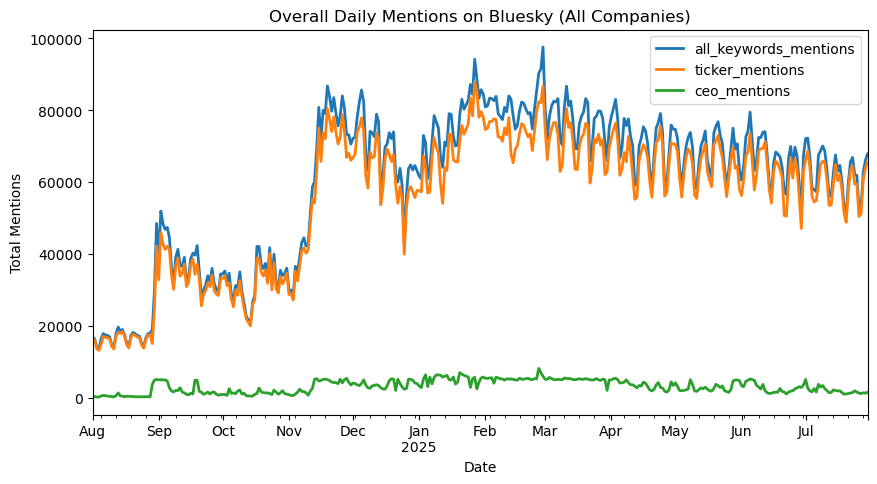

In [232]:
import matplotlib.pyplot as plt

# Total mentions per day (summing over all companies)
daily_mentions = ( 
    merged_df
    .groupby("date")[["all_keywords_mentions", "ticker_mentions", "ceo_mentions"]]
    .sum()
)

# Plot daily totals
daily_mentions.plot(figsize=(10,5), lw=2)
plt.title("Overall Daily Mentions on Bluesky (All Companies)")
plt.xlabel("Date")
plt.ylabel("Total Mentions")
plt.show()


In [243]:
#I am first exploring top 10 companies by all, ticker and CEO mention. This will help me
#understand the most talk about companies so that their stock volatility can be compared with 
#the least talked about companies. 

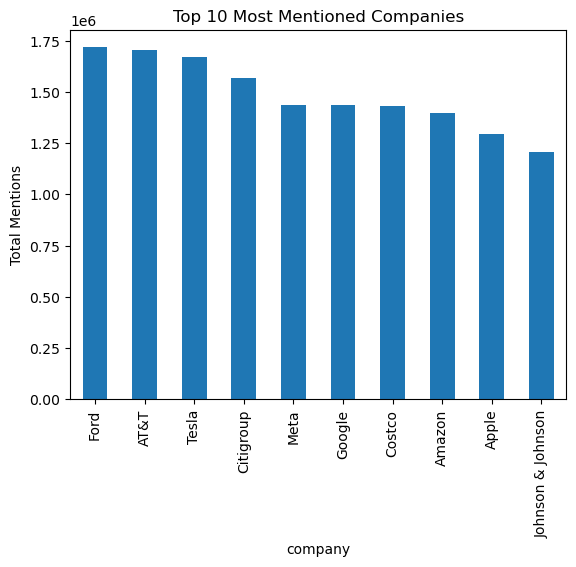

In [233]:
top_companies = (
    merged_df
    .groupby("company")[["all_keywords_mentions"]]
    .sum()
    .nlargest(10, "all_keywords_mentions")
)

top_companies.plot(kind="bar", legend=False, title="Top 10 Most Mentioned Companies")
plt.ylabel("Total Mentions")
plt.show()


,ticker_mentions
company,
Ford,1696139
AT&T,1668763
Citigroup,1547423
Costco,1430326
Google,1426315
Meta,1395129
Amazon,1333530
Apple,1283565
Johnson & Johnson,1202810


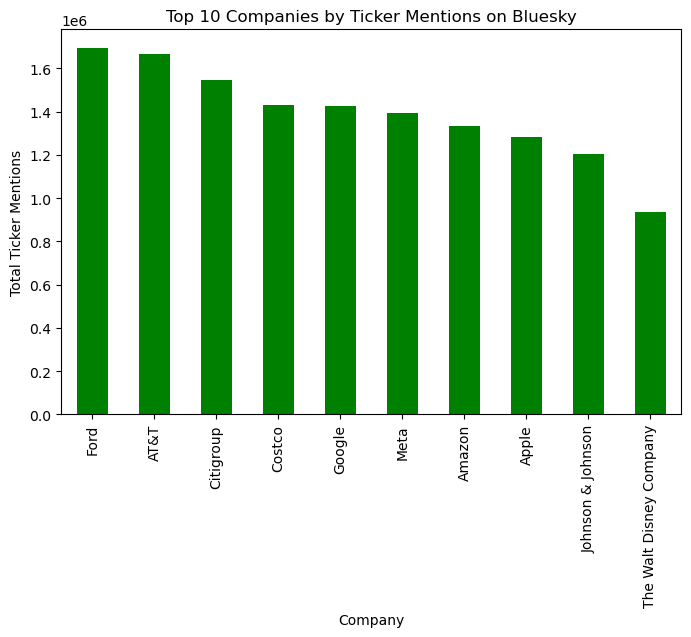

In [239]:
# Top 10 companies by ticker mentions
top_ticker = (
    ticker_long
    .groupby("company")[["ticker_mentions"]]
    .sum()
    .nlargest(10, "ticker_mentions")
)

# Display table
display(top_ticker)

# Plot
top_ticker.plot(kind="bar", legend=False, figsize=(8,5), color="green")
plt.title("Top 10 Companies by Ticker Mentions on Bluesky")
plt.ylabel("Total Ticker Mentions")
plt.xlabel("Company")
plt.show()


,ceo_mentions
company,
Tesla,938894
Amazon,75442
Meta,51317
Microsoft,41842
Apple,16318
McKesson,8950
JPMorgan,8811
Nvidia,6092
The Walt Disney Company,3627


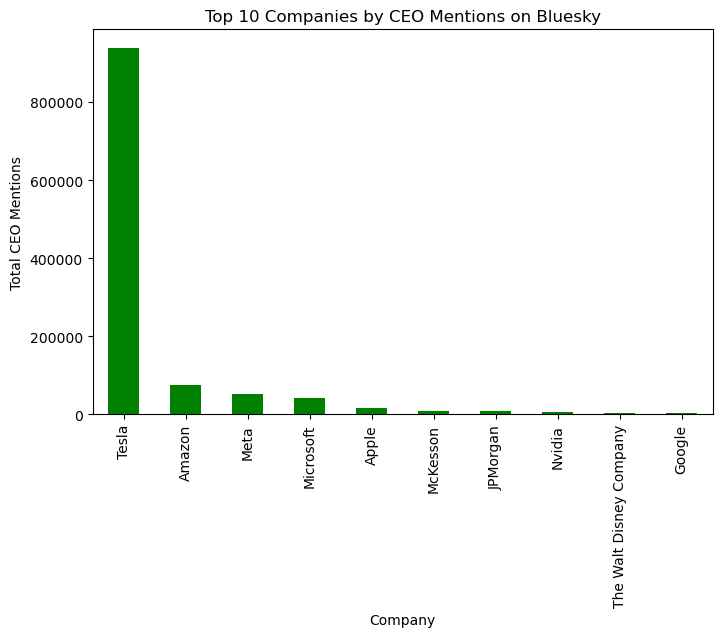

In [237]:
# Top 10 companies by CEO mentions
top_ceo = (
    ceo_long
    .groupby("company")[["ceo_mentions"]]
    .sum()
    .nlargest(10, "ceo_mentions")
)

# Display table
display(top_ceo)

# Plot
top_ceo.plot(kind="bar", legend=False, figsize=(8,5), color="green")
plt.title("Top 10 Companies by CEO Mentions on Bluesky")
plt.ylabel("Total CEO Mentions")
plt.xlabel("Company")
plt.show()

In [244]:
#Buttom 10 companies by all, ticker and ceo mention. This is ment to help later on compare it 
#volatility in stock with that of the most talked about stocks

,company,all_keywords_mentions
0,AbbVie,1679
1,Cardinal Health,3562
2,ExxonMobil,5490
3,Walgreens Boots Alliance,6369
4,Marathon Petroleum,6787
5,McKesson,7357
6,Wells Fargo,10901
7,Pfizer,12928
8,Cisco,14251
9,Chevron,17166


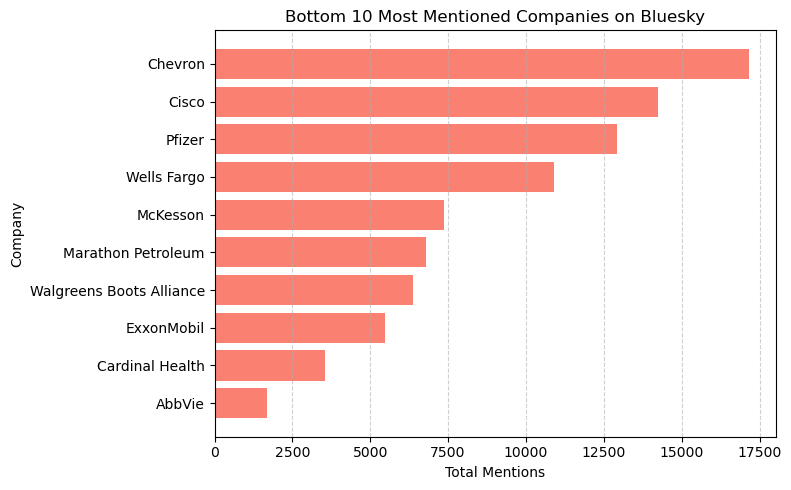

In [245]:

#  Bottom 10 Companies by Total Mentions


bottom10_companies = (
    combo.groupby("company")[["all_keywords_mentions"]]
    .sum()
    .nsmallest(10, "all_keywords_mentions")  # <-- lowest mentions
    .reset_index()
)

# --- Display table ---
display(bottom10_companies)

# --- Plot horizontal bar chart ---
plt.figure(figsize=(8,5))
plt.barh(bottom10_companies["company"], bottom10_companies["all_keywords_mentions"], color="salmon")
plt.title("Bottom 10 Most Mentioned Companies on Bluesky")
plt.xlabel("Total Mentions")
plt.ylabel("Company")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


,company,ticker_mentions
0,McKesson,1149
1,AbbVie,1669
2,Cardinal Health,3559
3,ExxonMobil,5390
4,Walgreens Boots Alliance,6337
5,Marathon Petroleum,6783
6,Wells Fargo,10894
7,Pfizer,12878
8,Cisco,14242
9,Comcast,16887


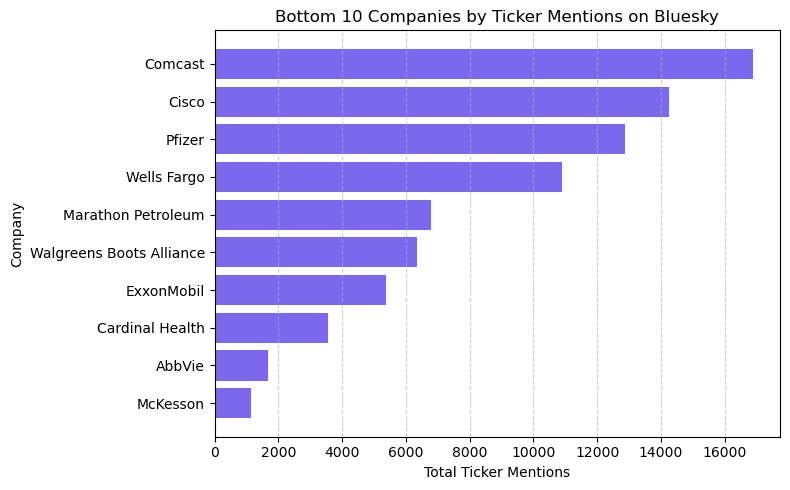

In [247]:

# Bottom 10 Companies by Ticker Mentions


bottom10_ticker = (
    combo.groupby("company")[["ticker_mentions"]]
    .sum()
    .nsmallest(10, "ticker_mentions")  # Lowest ticker mentions
    .reset_index()
)

# --- Display table ---
display(bottom10_ticker)

# --- Plot horizontal bar chart ---
plt.figure(figsize=(8,5))
plt.barh(bottom10_ticker["company"], bottom10_ticker["ticker_mentions"], color="mediumslateblue")
plt.title("Bottom 10 Companies by Ticker Mentions on Bluesky")
plt.xlabel("Total Ticker Mentions")
plt.ylabel("Company")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


,company,ceo_mentions
0,Cencora,1
1,Marathon Petroleum,2
2,Honeywell,2
3,Cardinal Health,5
4,Boeing,6
5,Wells Fargo,10
6,AbbVie,10
7,Johnson & Johnson,11
8,Chevron,14
9,Verizon,18


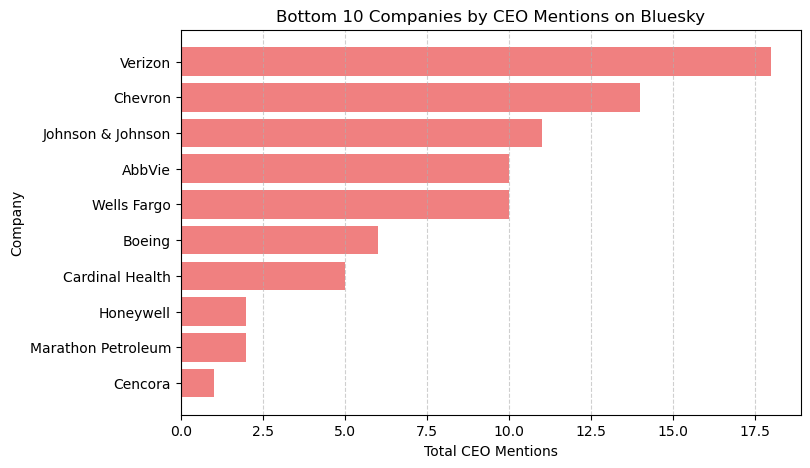

In [248]:
# bottom 10 companies by CEO mentions 
bottom10_ceo = (
    combo.groupby("company")[["ceo_mentions"]]
    .sum()
    .sort_values("ceo_mentions", ascending=True)
    .head(10)
    .reset_index()
)

# Display table 
display(bottom10_ceo)

#Plot horizontal bar chart 
plt.figure(figsize=(8,5))
plt.barh(bottom10_ceo["company"], bottom10_ceo["ceo_mentions"], color="lightcoral")
plt.title("Bottom 10 Companies by CEO Mentions on Bluesky")
plt.xlabel("Total CEO Mentions")
plt.ylabel("Company")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


In [249]:
import os

STOCK_DIR = os.path.join(BASE, "data_aquisition")
print("Stock acquisition folder:", STOCK_DIR)
print("Files inside:", os.listdir(STOCK_DIR))


Stock acquisition folder: ../data_aquisition
Files inside: ['bluesky.ipynb', 'stockdata.ipynb', 'bluesky_allkeywords.csv', 'clean_stock_data.csv', '.ipynb_checkpoints', 'bluesky_ticker.csv']


In [250]:

STOCK_PATH = "../data_aquisition/clean_stock_data.csv"
stock_df = pd.read_csv(STOCK_PATH, parse_dates=["Date"])


In [251]:
#Structure of stock data
print(stock_df.shape)
print(stock_df.columns)
stock_df.head(30)

(33690, 6)
Index(['Date', 'Ticker', 'Close', 'log_return', 'weekly_variance',
       'monthly_variance'],
      dtype='object')


,Date,Ticker,Close,log_return,weekly_variance,monthly_variance
0,2023-01-03,AAPL,123.330650,NaN,NaN,NaN
1,2023-01-04,AAPL,124.602715,0.010261,NaN,NaN
2,2023-01-05,AAPL,123.281334,-0.010661,NaN,NaN
3,2023-01-06,AAPL,127.817360,0.036133,NaN,NaN
4,2023-01-09,AAPL,128.339981,0.004080,NaN,NaN
5,2023-01-10,AAPL,128.911911,0.004446,0.000292,NaN
6,2023-01-11,AAPL,131.633560,0.020893,0.000322,NaN
7,2023-01-12,AAPL,131.554688,-0.000599,0.000234,NaN
8,2023-01-13,AAPL,132.885895,0.010068,0.000068,NaN
9,2023-01-17,AAPL,134.049500,0.008718,0.000064,NaN


In [252]:
stock_df.info()

# Check missing values
missing = stock_df.isna().sum().sort_values(ascending=False)
print("\nMissing values:")
print(missing[missing > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33690 entries, 0 to 33689
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              33690 non-null  datetime64[ns]
 1   Ticker            33690 non-null  object        
 2   Close             33690 non-null  float64       
 3   log_return        33641 non-null  float64       
 4   weekly_variance   33445 non-null  float64       
 5   monthly_variance  32661 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.5+ MB

Missing values:
monthly_variance    1029
weekly_variance      245
log_return            49
dtype: int64


In [253]:
#summary statistics
stock_df.describe().T


,count,mean,min,25%,50%,75%,max,std
Date,33690,2024-05-16 09:15:54.657168384,2023-01-03 00:00:00,2023-09-08 00:00:00,2024-05-15 00:00:00,2025-01-23 00:00:00,2025-09-30 00:00:00,NaN
Close,33690.0,168.471131,8.006781,54.252595,130.803558,206.19735,1073.970825,162.20671
log_return,33641.0,0.00063,-0.517023,-0.007784,0.000871,0.009425,0.274737,0.019329
weekly_variance,33445.0,0.000374,0.0,0.000072,0.000156,0.000342,0.056728,0.001083
monthly_variance,32661.0,0.000376,0.000005,0.000126,0.000214,0.000396,0.013651,0.000598


In [254]:
#Date range and company coverage 
print("Date range:", stock_df['Date'].min(), "to", stock_df['Date'].max())
print("Number of unique tickers:", stock_df['Ticker'].nunique())
print("Sample tickers:", stock_df['Ticker'].unique()[:10])


Date range: 2023-01-03 00:00:00 to 2025-09-30 00:00:00
Number of unique tickers: 49
Sample tickers: ['AAPL' 'ABBV' 'AMZN' 'BA' 'BAC' 'C' 'CAH' 'CI' 'CMCSA' 'CNC']


In [255]:
#Identifing the most active stocks (most trading days)
top_activity = (
    stock_df.groupby("Ticker")["Date"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)
print(top_activity)


Ticker
AAPL    688
ABBV    688
JNJ     688
JPM     688
KR      688
MCK     688
META    688
MPC     688
MS      688
MSFT    688
Name: Date, dtype: int64


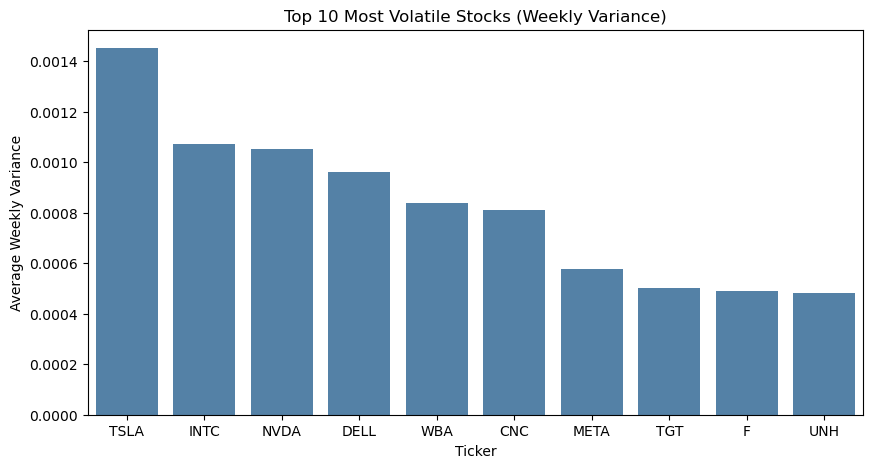

In [256]:
#Top 10 Most Volatile Stocks (Mean Weekly Variance)
import seaborn as sns
import matplotlib.pyplot as plt

top_volatility = (
    stock_df.groupby("Ticker")["weekly_variance"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_volatility.index, y=top_volatility.values, color="steelblue")
plt.title("Top 10 Most Volatile Stocks (Weekly Variance)")
plt.ylabel("Average Weekly Variance")
plt.show()


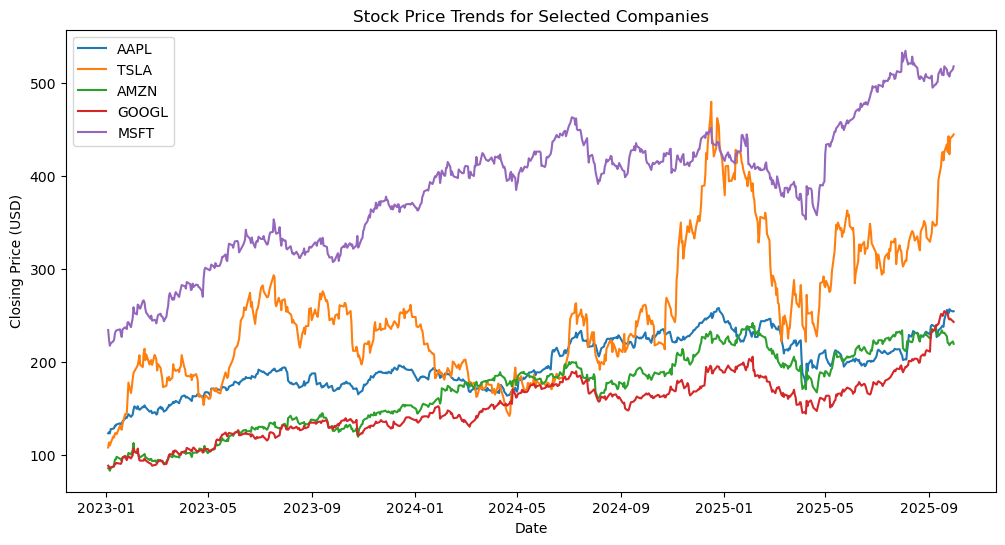

In [257]:
#Closing Price Trends for Selected Stocks
sample_tickers = ["AAPL", "TSLA", "AMZN", "GOOGL", "MSFT"]
plt.figure(figsize=(12,6))

for t in sample_tickers:
    subset = stock_df[stock_df["Ticker"] == t]
    plt.plot(subset["Date"], subset["Close"], label=t)

plt.title("Stock Price Trends for Selected Companies")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()


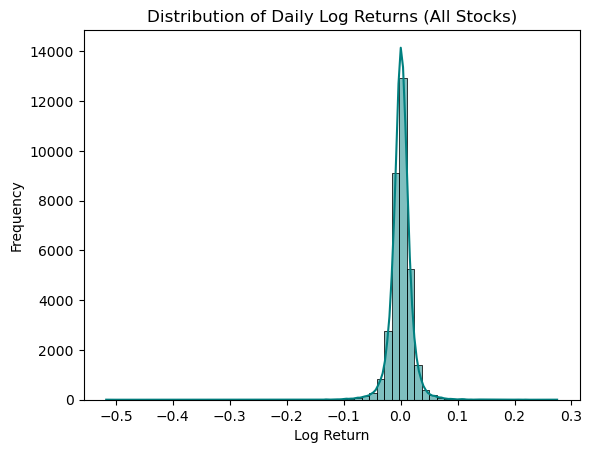

In [187]:
#Distribution of Daily Log Returns
sns.histplot(stock_df["log_return"], bins=60, kde=True, color="teal")
plt.title("Distribution of Daily Log Returns (All Stocks)")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.show()


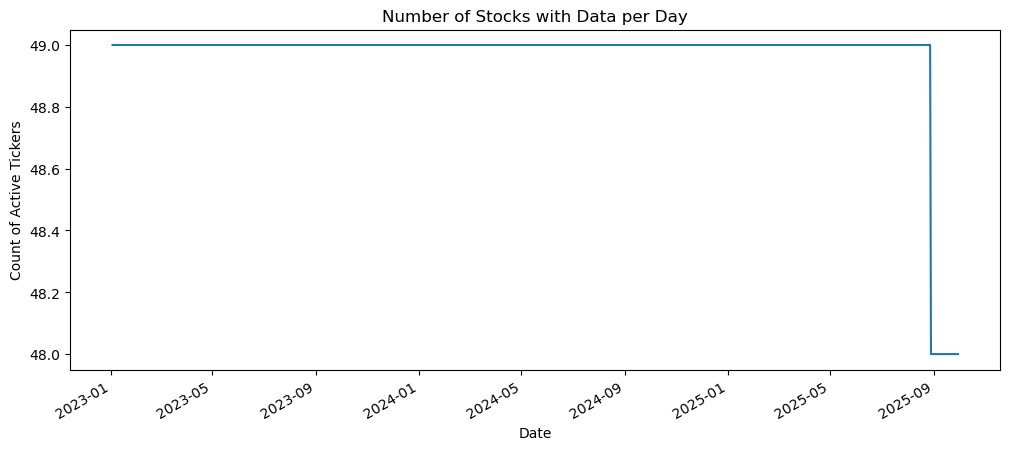

In [188]:
#Daily Market Activity (How many stocks traded per day)
plt.figure(figsize=(12,5))
stock_df.groupby("Date")["Ticker"].count().plot()
plt.title("Number of Stocks with Data per Day")
plt.ylabel("Count of Active Tickers")
plt.xlabel("Date")
plt.show()


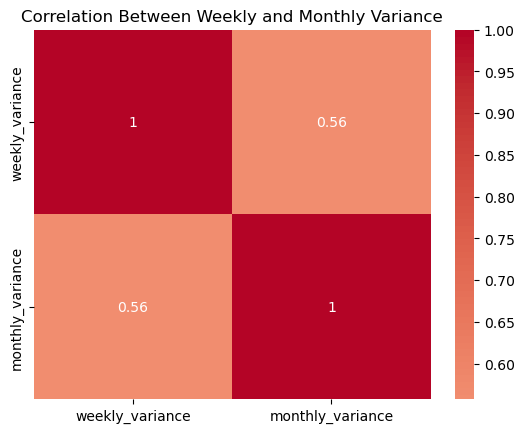

In [189]:
#Correlation between Weekly & Monthly Variance
corr = stock_df[["weekly_variance", "monthly_variance"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Weekly and Monthly Variance")
plt.show()


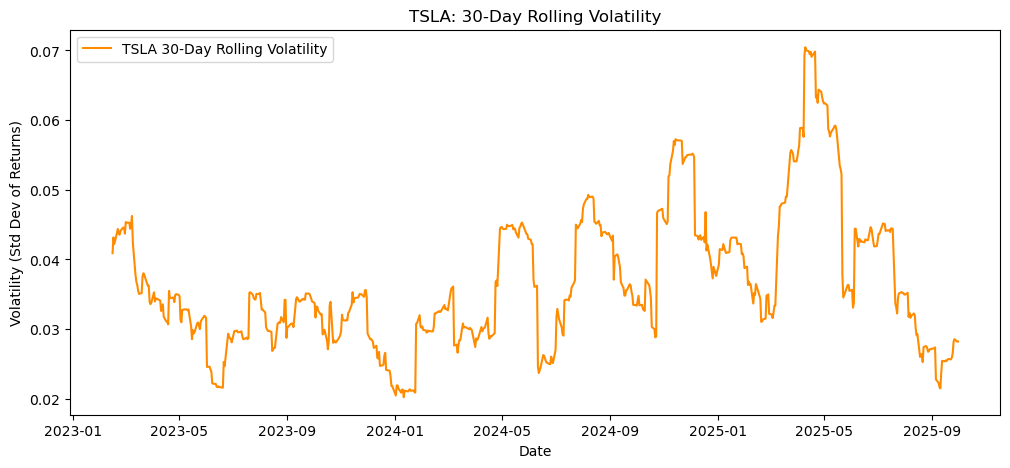

In [190]:
#Rolling Volatility Example (Tesla)
ticker = "TSLA"
tsla = stock_df[stock_df["Ticker"] == ticker].sort_values("Date")
tsla["rolling_volatility"] = tsla["log_return"].rolling(window=30).std()

plt.figure(figsize=(12,5))
plt.plot(tsla["Date"], tsla["rolling_volatility"], label=f"{ticker} 30-Day Rolling Volatility", color="darkorange")
plt.title(f"{ticker}: 30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (Std Dev of Returns)")
plt.legend()
plt.show()


In [191]:
import pandas as pd

#  MAPPINGS (paste-as-is)
sp500_tickers = [
"WMT","AMZN","AAPL","CVS","TSLA","GOOGL","META","JPM","COST","KR",
"WBA","TGT","UPS","CNC","CI","MSFT","VZ","IBM","UNH","XOM",
"MCK","CVX","CAH","HD","WBA","MPC","COR","F","C","DELL",
"GM","NVDA","PFE","PG","CMCSA","JNJ","WFC","BAC","ABBV","SBUX",
"CSCO","T","PEP","INTC","DIS","BA","GS","MS","HON","CRM"
]

fortune_20 ={
    1:"Walmart",2:"Amazon",3:"Apple",4:"CVS",5:"Tesla",6:"Google",7:"Meta",8:"JPMorgan",9:"Costco",10:"Kroger",
    11:"Walgreens",12:"Target",13:"UPS",14:"Centene",15:"Cigna",16:"Microsoft",17:"Verizon",18:"IBM",19:"UnitedHealth",20:"ExxonMobil",
    21:"McKesson",22:"Chevron",23:"Cardinal Health",24:"Home Depot",25:"Walgreens Boots Alliance",26:"Marathon Petroleum",27:"Cencora",
    28:"Ford",29:"Citigroup",30:"Dell Technologies",31:"General Motors",32:"Nvidia",33:"Pfizer",34:"Procter & Gamble",35:"Comcast",
    36:"Johnson & Johnson",37:"Wells Fargo",38:"Bank of America",39:"AbbVie",40:"Starbucks",41:"Cisco",42:"AT&T",43:"PepsiCo",
    44:"Intel",45:"The Walt Disney Company",46:"Boeing",47:"Goldman Sachs",48:"Morgan Stanley",49:"Honeywell",50:"Salesforce"
}


# Build company->ticker dict (order of fortune_20 keys is numeric 1..50)
company_names_ordered = [fortune_20[k] for k in sorted(fortune_20.keys())]
company_to_ticker = dict(zip(company_names_ordered, sp500_tickers))

# Quick sanity check
# print({k: company_to_ticker[k] for k in list(company_to_ticker)[:10]})

#  LOAD DATA 
STOCK_PATH   = "../data_aquisition/clean_stock_data.csv"
MENTIONS_PATH= "../initial_data_analysis/bluesky_merged_mentions.csv"

stock_df    = pd.read_csv(STOCK_PATH, parse_dates=["Date"])
mentions_df = pd.read_csv(MENTIONS_PATH, parse_dates=["date"])

# Normalize dates to midnight (ensures exact matches)
stock_df["Date"] = stock_df["Date"].dt.normalize()
mentions_df["date"] = mentions_df["date"].dt.normalize()

print("Loaded. Stock:", stock_df.shape, " Mentions:", mentions_df.shape)

#  MAP COMPANY → TICKER 
mentions_df["Ticker"] = mentions_df["company"].map(company_to_ticker)

unmapped = mentions_df.loc[mentions_df["Ticker"].isna(), "company"].unique()
print(f"Unmapped company names: {len(unmapped)}")
if len(unmapped):
    print("Sample unmapped:", unmapped[:15])

# Keep only rows we can map
mentions_df = mentions_df.dropna(subset=["Ticker"])

#  MERGE 
stock_cols = ["Date","Ticker","Close","log_return","weekly_variance","monthly_variance"]
combo = stock_df[stock_cols].merge(
    mentions_df,
    left_on=["Ticker","Date"],
    right_on=["Ticker","date"],
    how="inner"
).drop(columns=["date"])

print("Merge complete. Shape:", combo.shape)
display(combo.head())

# SAVE
OUT_PATH = "../initial_data_analysis/bluesky_stock_merged_final.csv"
combo.to_csv(OUT_PATH, index=False)
print("Saved to:", OUT_PATH)




Loaded. Stock: (33690, 6)  Mentions: (18200, 5)
Unmapped company names: 0
Merge complete. Shape: (12450, 10)


,Date,Ticker,Close,log_return,weekly_variance,monthly_variance,company,all_keywords_mentions,ticker_mentions,ceo_mentions
0,2024-08-01,AAPL,217.097183,-0.016893,0.000129,0.000220,Apple,1363,1364,1
1,2024-08-02,AAPL,218.588486,0.006846,0.000137,0.000221,Apple,1409,1407,9
2,2024-08-05,AAPL,208.059738,-0.049366,0.000661,0.000305,Apple,1347,1346,2
3,2024-08-06,AAPL,206.031540,-0.009796,0.000624,0.000301,Apple,1322,1318,4
4,2024-08-07,AAPL,208.606567,0.012421,0.000594,0.000312,Apple,1373,1373,1


Saved to: ../initial_data_analysis/bluesky_stock_merged_final.csv


In [193]:
# Desired column order
new_order = [
    "Date", "company", "Ticker",
    "all_keywords_mentions", "ticker_mentions", "ceo_mentions",
    "Close", "log_return", "weekly_variance", "monthly_variance"
]

#  Reorder and keeping only those columns 
combo = combo[[col for col in new_order if col in combo.columns]]

# Save
OUT_PATH = "../initial_data_analysis/bluesky_stock_merged_final.csv"
combo.to_csv(OUT_PATH, index=False)

print(" Columns reordered and saved at:", OUT_PATH)
print("Column order:")
print(combo.columns.tolist())

# Preview
display(combo.head(10))


 Columns reordered and saved at: ../initial_data_analysis/bluesky_stock_merged_final.csv
Column order:
['Date', 'company', 'Ticker', 'all_keywords_mentions', 'ticker_mentions', 'ceo_mentions', 'Close', 'log_return', 'weekly_variance', 'monthly_variance']


,Date,company,Ticker,all_keywords_mentions,ticker_mentions,ceo_mentions,Close,log_return,weekly_variance,monthly_variance
0,2024-08-01,Apple,AAPL,1363,1364,1,217.097183,-0.016893,0.000129,0.000220
1,2024-08-02,Apple,AAPL,1409,1407,9,218.588486,0.006846,0.000137,0.000221
2,2024-08-05,Apple,AAPL,1347,1346,2,208.059738,-0.049366,0.000661,0.000305
3,2024-08-06,Apple,AAPL,1322,1318,4,206.031540,-0.009796,0.000624,0.000301
4,2024-08-07,Apple,AAPL,1373,1373,1,208.606567,0.012421,0.000594,0.000312
5,2024-08-08,Apple,AAPL,1289,1288,2,212.076370,0.016496,0.000724,0.000307
6,2024-08-09,Apple,AAPL,1322,1321,1,214.989456,0.013643,0.000773,0.000301
7,2024-08-12,Apple,AAPL,2176,2170,4,216.522293,0.007105,0.000110,0.000294
8,2024-08-13,Apple,AAPL,1647,1648,1,220.244995,0.017047,0.000016,0.000295
9,2024-08-14,Apple,AAPL,1579,1578,0,220.692871,0.002031,0.000042,0.000295


,all_keywords_mentions,ticker_mentions,ceo_mentions,share_of_total
company,,,,
Ford,1203352,1187719,563,0.078063
Tesla,1182120,553323,660628,0.076686
AT&T,1173931,1146655,45,0.076155
Citigroup,1062481,1050348,176,0.068925
Meta,1018482,991150,35791,0.066071
Google,1012072,1004523,2673,0.065655
Costco,998193,997614,81,0.064754
Amazon,982929,935728,55863,0.063764
Apple,923037,915119,11273,0.059879


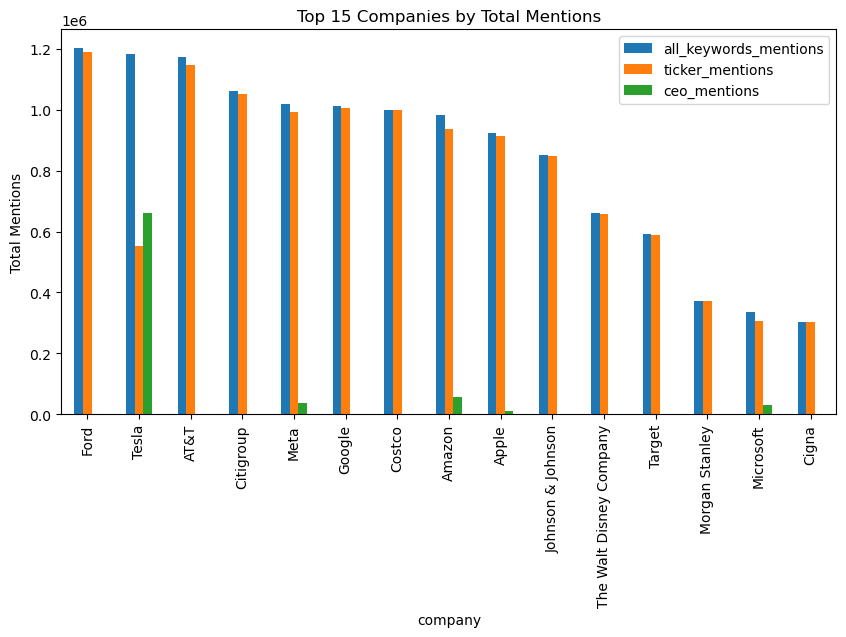

In [195]:
# 1️⃣ Distribution of mentions across companies
mention_summary = (
    combo.groupby("company")[["all_keywords_mentions", "ticker_mentions", "ceo_mentions"]]
    .sum()
    .sort_values("all_keywords_mentions", ascending=False)
)
mention_summary["share_of_total"] = (
    mention_summary["all_keywords_mentions"] / mention_summary["all_keywords_mentions"].sum()
)
display(mention_summary.head(15))

# Plot
mention_summary.head(15).plot(
    y=["all_keywords_mentions", "ticker_mentions", "ceo_mentions"],
    kind="bar", figsize=(10,5), title="Top 15 Companies by Total Mentions"
)
plt.ylabel("Total Mentions")
plt.show()



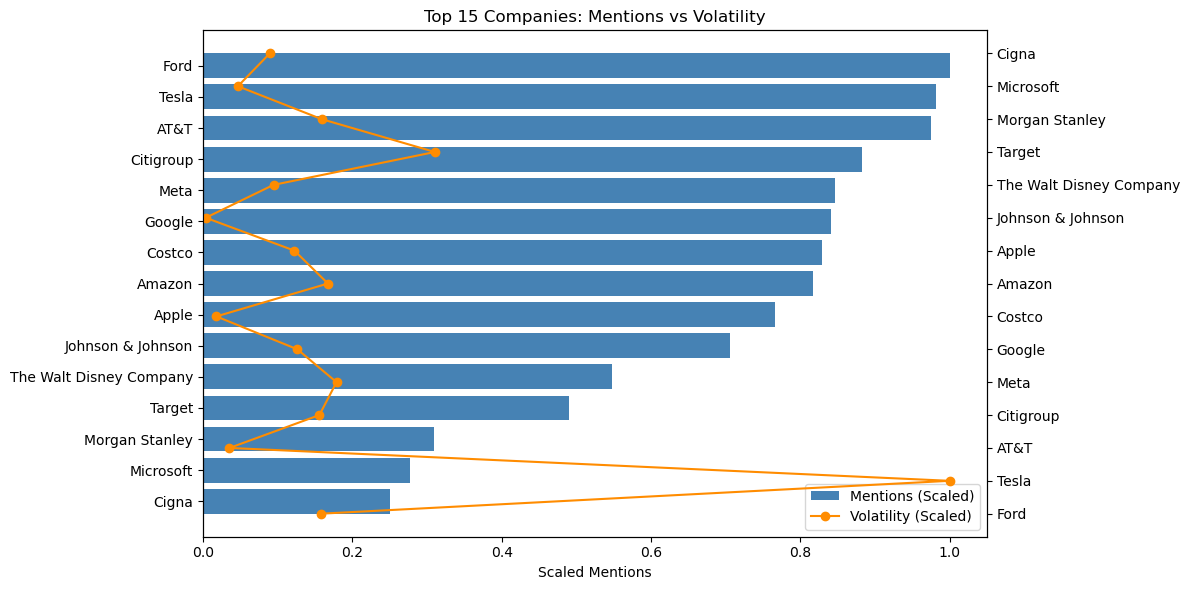

📈 Correlation between total mentions and average weekly volatility: 0.036


In [258]:
# Comparing total mentions vs average volatility
#to see if the most discussed companies are also the most volatile.


#The blue bars show scaled total mentions per firm.
#The orange line shows scaled average volatility.
#If the orange line tracks the blue bars closely, it suggests a positive attention–volatility link.
mention_vol_df = (
    combo.groupby("company")[["all_keywords_mentions", "ticker_mentions", "ceo_mentions", "weekly_variance"]]
    .agg({
        "all_keywords_mentions": "sum",
        "ticker_mentions": "sum",
        "ceo_mentions": "sum",
        "weekly_variance": "mean"
    })
    .sort_values("all_keywords_mentions", ascending=False)
    .reset_index()
)

# Normalize both for comparability (0–1 scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
mention_vol_df[["mentions_scaled", "volatility_scaled"]] = scaler.fit_transform(
    mention_vol_df[["all_keywords_mentions", "weekly_variance"]]
)

# --- Plot 1: Mentions vs Volatility (Top 15)
top15 = mention_vol_df.head(15)

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.barh(top15["company"], top15["mentions_scaled"], color="steelblue", label="Mentions (Scaled)")
ax2 = ax1.twinx()
ax2.plot(top15["volatility_scaled"], top15["company"], color="darkorange", marker="o", label="Volatility (Scaled)")

ax1.set_xlabel("Scaled Mentions")
ax2.set_xlabel("Scaled Volatility")
ax1.set_title("Top 15 Companies: Mentions vs Volatility")
ax1.invert_yaxis()

# Combine legends from both axes
lns1, labs1 = ax1.get_legend_handles_labels()
lns2, labs2 = ax2.get_legend_handles_labels()
ax1.legend(lns1 + lns2, labs1 + labs2, loc="lower right")

plt.tight_layout()
plt.show()

# --- Plot 2: Correlation between attention and volatility
corr = mention_vol_df[["all_keywords_mentions", "weekly_variance"]].corr().iloc[0,1]
print(f"📈 Correlation between total mentions and average weekly volatility: {corr:.3f}")


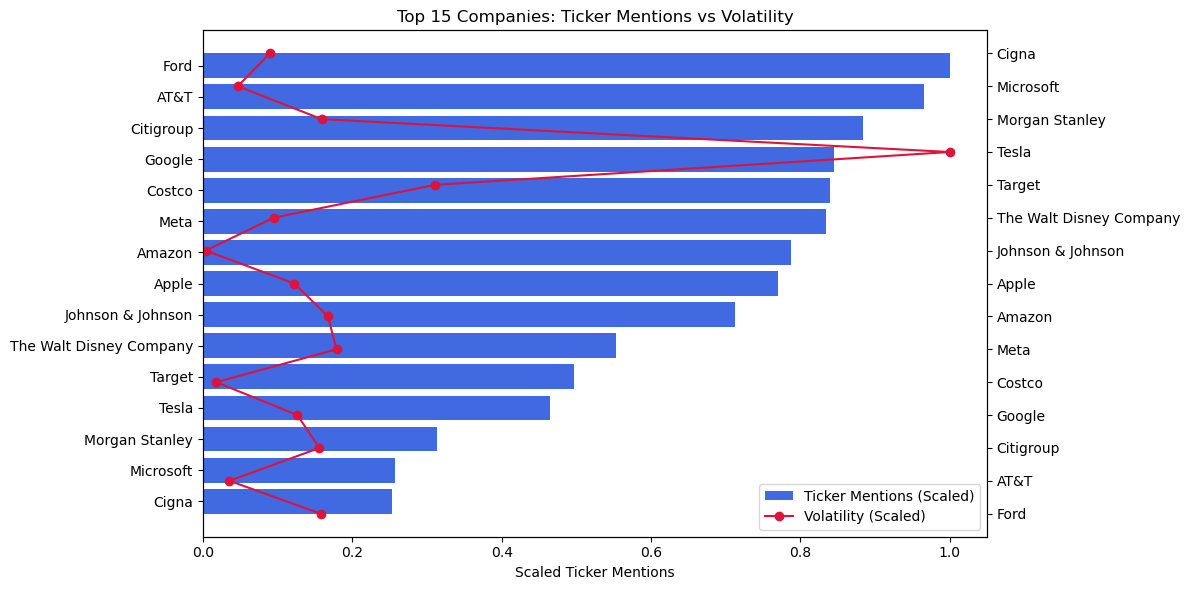

📈 Correlation between total ticker mentions and average weekly volatility: -0.079


In [217]:
# Compare ticker mentions vs average volatility
ticker_vol_df = (
    combo.groupby("company")[["ticker_mentions", "weekly_variance"]]
    .agg({
        "ticker_mentions": "sum",
        "weekly_variance": "mean"
    })
    .sort_values("ticker_mentions", ascending=False)
    .reset_index()
)

# Normalize both metrics (0–1 range for comparability)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ticker_vol_df[["ticker_mentions_scaled", "volatility_scaled"]] = scaler.fit_transform(
    ticker_vol_df[["ticker_mentions", "weekly_variance"]]
)

# --- Plot: Ticker Mentions vs Volatility (Top 15)
top15_ticker = ticker_vol_df.head(15)

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.barh(top15_ticker["company"], top15_ticker["ticker_mentions_scaled"], color="royalblue", label="Ticker Mentions (Scaled)")
ax2 = ax1.twinx()
ax2.plot(top15_ticker["volatility_scaled"], top15_ticker["company"], color="crimson", marker="o", label="Volatility (Scaled)")

ax1.set_xlabel("Scaled Ticker Mentions")
ax2.set_xlabel("Scaled Volatility")
ax1.set_title("Top 15 Companies: Ticker Mentions vs Volatility")
ax1.invert_yaxis()

# Combine legends
lns1, labs1 = ax1.get_legend_handles_labels()
lns2, labs2 = ax2.get_legend_handles_labels()
ax1.legend(lns1 + lns2, labs1 + labs2, loc="lower right")

plt.tight_layout()
plt.show()

# --- Correlation between ticker mentions and volatility
ticker_corr = ticker_vol_df[["ticker_mentions", "weekly_variance"]].corr().iloc[0,1]
print(f"📈 Correlation between total ticker mentions and average weekly volatility: {ticker_corr:.3f}")


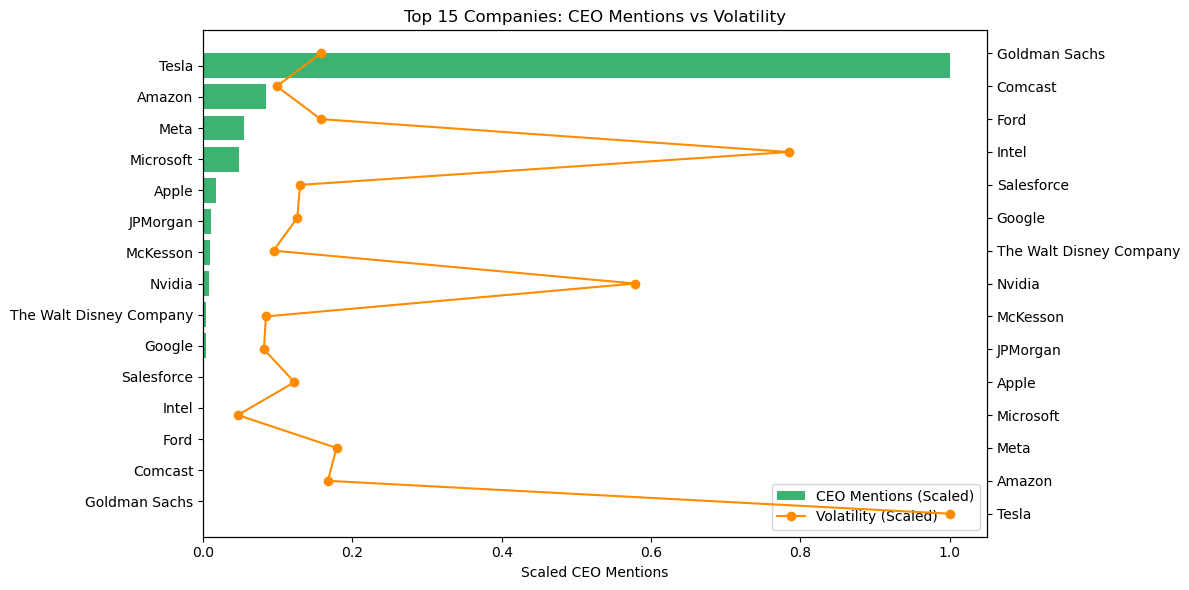

📈 Correlation between total CEO mentions and average weekly volatility: 0.520


In [215]:
# Compare CEO mentions vs average volatility
ceo_vol_df = (
    combo.groupby("company")[["ceo_mentions", "weekly_variance"]]
    .agg({
        "ceo_mentions": "sum",
        "weekly_variance": "mean"
    })
    .sort_values("ceo_mentions", ascending=False)
    .reset_index()
)

# Normalize both metrics (0–1 range for comparability)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ceo_vol_df[["ceo_mentions_scaled", "volatility_scaled"]] = scaler.fit_transform(
    ceo_vol_df[["ceo_mentions", "weekly_variance"]]
)

# --- Plot: CEO Mentions vs Volatility (Top 15)
top15_ceo = ceo_vol_df.head(15)

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.barh(top15_ceo["company"], top15_ceo["ceo_mentions_scaled"], color="mediumseagreen", label="CEO Mentions (Scaled)")
ax2 = ax1.twinx()
ax2.plot(top15_ceo["volatility_scaled"], top15_ceo["company"], color="darkorange", marker="o", label="Volatility (Scaled)")

ax1.set_xlabel("Scaled CEO Mentions")
ax2.set_xlabel("Scaled Volatility")
ax1.set_title("Top 15 Companies: CEO Mentions vs Volatility")
ax1.invert_yaxis()

# Combine legends
lns1, labs1 = ax1.get_legend_handles_labels()
lns2, labs2 = ax2.get_legend_handles_labels()
ax1.legend(lns1 + lns2, labs1 + labs2, loc="lower right")

plt.tight_layout()
plt.show()

# --- Correlation between CEO mentions and volatility
ceo_corr = ceo_vol_df[["ceo_mentions", "weekly_variance"]].corr().iloc[0,1]
print(f"📈 Correlation between total CEO mentions and average weekly volatility: {ceo_corr:.3f}")


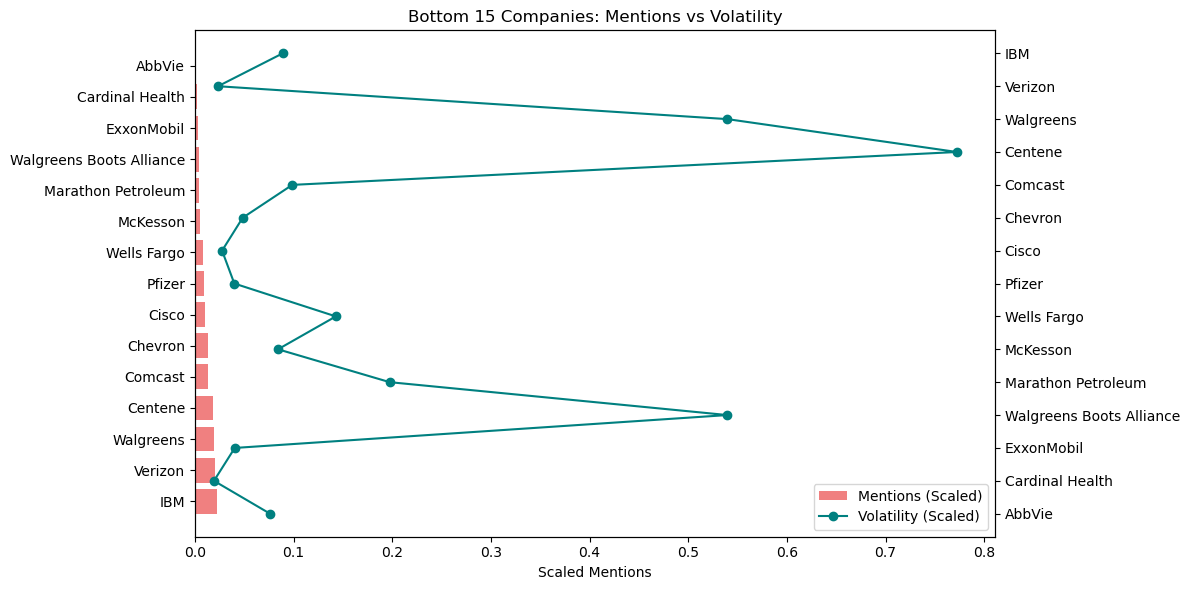

📉 Correlation between total mentions and average weekly volatility (Bottom 15 companies): 0.281


In [260]:

# Bottom 15 Companies: Mentions vs Volatility



bottom15 = mention_vol_df.tail(15).sort_values("all_keywords_mentions", ascending=True)

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.barh(bottom15["company"], bottom15["mentions_scaled"], color="lightcoral", label="Mentions (Scaled)")
ax2 = ax1.twinx()
ax2.plot(bottom15["volatility_scaled"], bottom15["company"], color="teal", marker="o", label="Volatility (Scaled)")

ax1.set_xlabel("Scaled Mentions")
ax2.set_xlabel("Scaled Volatility")
ax1.set_title("Bottom 15 Companies: Mentions vs Volatility")
ax1.invert_yaxis()

# Combine legends from both axes
lns1, labs1 = ax1.get_legend_handles_labels()
lns2, labs2 = ax2.get_legend_handles_labels()
ax1.legend(lns1 + lns2, labs1 + labs2, loc="lower right")

plt.tight_layout()
plt.show()

# --- Correlation between attention and volatility (bottom firms only)
corr_bottom = bottom15[["all_keywords_mentions", "weekly_variance"]].corr().iloc[0,1]
print(f"📉 Correlation between total mentions and average weekly volatility (Bottom 15 companies): {corr_bottom:.3f}")


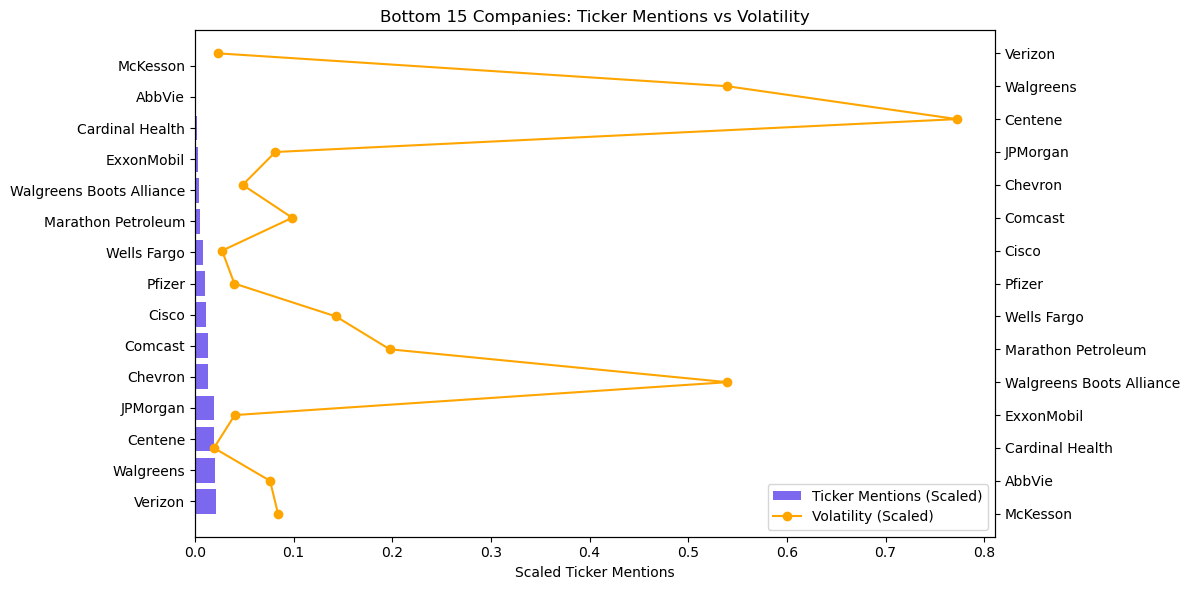

📉 Correlation between ticker mentions and average weekly volatility (Bottom 15 companies): 0.319


In [262]:

#  Bottom 15 Companies by Ticker Mentions vs Volatility


ticker_vol_df = (
    combo.groupby("company")[["ticker_mentions", "weekly_variance"]]
    .agg({"ticker_mentions": "sum", "weekly_variance": "mean"})
    .sort_values("ticker_mentions", ascending=False)
    .reset_index()
)

# Normalize for comparability
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ticker_vol_df[["mentions_scaled", "volatility_scaled"]] = scaler.fit_transform(
    ticker_vol_df[["ticker_mentions", "weekly_variance"]]
)

# Plot Bottom 15 
bottom15_ticker = ticker_vol_df.tail(15).sort_values("ticker_mentions", ascending=True)

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.barh(bottom15_ticker["company"], bottom15_ticker["mentions_scaled"], color="mediumslateblue", label="Ticker Mentions (Scaled)")
ax2 = ax1.twinx()
ax2.plot(bottom15_ticker["volatility_scaled"], bottom15_ticker["company"], color="orange", marker="o", label="Volatility (Scaled)")

ax1.set_xlabel("Scaled Ticker Mentions")
ax2.set_xlabel("Scaled Volatility")
ax1.set_title("Bottom 15 Companies: Ticker Mentions vs Volatility")
ax1.invert_yaxis()

# Combine legends
lns1, labs1 = ax1.get_legend_handles_labels()
lns2, labs2 = ax2.get_legend_handles_labels()
ax1.legend(lns1 + lns2, labs1 + labs2, loc="lower right")

plt.tight_layout()
plt.show()

#Correlation 
corr_bottom_ticker = bottom15_ticker[["ticker_mentions", "weekly_variance"]].corr().iloc[0,1]
print(f"📉 Correlation between ticker mentions and average weekly volatility (Bottom 15 companies): {corr_bottom_ticker:.3f}")


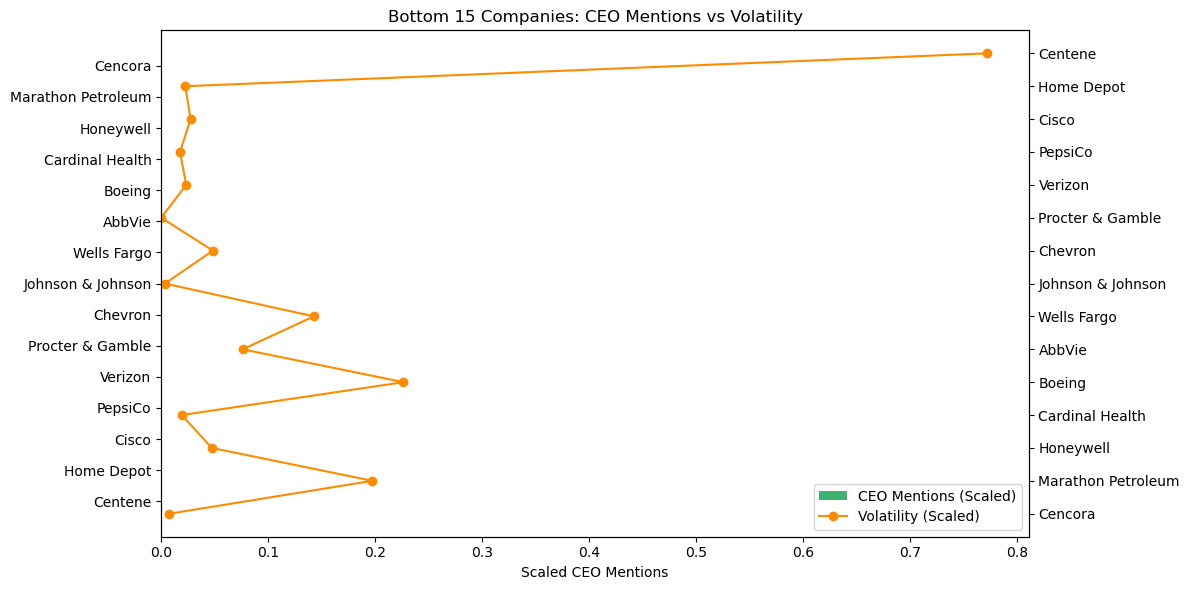

📉 Correlation between CEO mentions and average weekly volatility (Bottom 15 companies): 0.442


In [264]:

# Bottom 15 Companies by CEO Mentions vs Volatility


# Group data by company and aggregate CEO mentions + weekly volatility
ceo_vol_df = (
    combo.groupby("company")[["ceo_mentions", "weekly_variance"]]
    .agg({
        "ceo_mentions": "sum",
        "weekly_variance": "mean"
    })
    .sort_values("ceo_mentions", ascending=False)
    .reset_index()
)

# Normalize both variables for comparability (0–1 scale)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ceo_vol_df[["mentions_scaled", "volatility_scaled"]] = scaler.fit_transform(
    ceo_vol_df[["ceo_mentions", "weekly_variance"]]
)

# Select the bottom 15 companies (least CEO mentions)
bottom15_ceo = ceo_vol_df.tail(15).sort_values("ceo_mentions", ascending=True)

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.barh(bottom15_ceo["company"], bottom15_ceo["mentions_scaled"],
          color="mediumseagreen", label="CEO Mentions (Scaled)")
ax2 = ax1.twinx()
ax2.plot(bottom15_ceo["volatility_scaled"], bottom15_ceo["company"],
          color="darkorange", marker="o", label="Volatility (Scaled)")

ax1.set_xlabel("Scaled CEO Mentions")
ax2.set_xlabel("Scaled Volatility")
ax1.set_title("Bottom 15 Companies: CEO Mentions vs Volatility")
ax1.invert_yaxis()

# Combine legends from both axes
lns1, labs1 = ax1.get_legend_handles_labels()
lns2, labs2 = ax2.get_legend_handles_labels()
ax1.legend(lns1 + lns2, labs1 + labs2, loc="lower right")

plt.tight_layout()
plt.show()

# --- Correlation between CEO mentions and volatility for bottom firms
corr_bottom_ceo = bottom15_ceo[["ceo_mentions", "weekly_variance"]].corr().iloc[0,1]
print(f"📉 Correlation between CEO mentions and average weekly volatility (Bottom 15 companies): {corr_bottom_ceo:.3f}")


In [265]:
# Compute correlations for all sentiment types 
corr_summary = {
    "Metric": ["Total Mentions", "Ticker Mentions", "CEO Mentions"],
    "Correlation with Volatility": [
        combo.groupby("company")[["all_keywords_mentions", "weekly_variance"]].sum().corr().iloc[0,1],
        combo.groupby("company")[["ticker_mentions", "weekly_variance"]].sum().corr().iloc[0,1],
        combo.groupby("company")[["ceo_mentions", "weekly_variance"]].sum().corr().iloc[0,1],
    ]
}

corr_df = pd.DataFrame(corr_summary)
corr_df.style.background_gradient(cmap="coolwarm", subset=["Correlation with Volatility"]).format({"Correlation with Volatility": "{:.3f}"})


,Metric,Correlation with Volatility
0,Total Mentions,0.036
1,Ticker Mentions,-0.079
2,CEO Mentions,0.520


/var/folders/kw/1cy6mn5n2470gd9bxnxbkhg80000gn/T/ipykernel_12713/1534977930.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_sensitivity.head(15), x="corr_mentions_vol", y="company", palette="coolwarm")


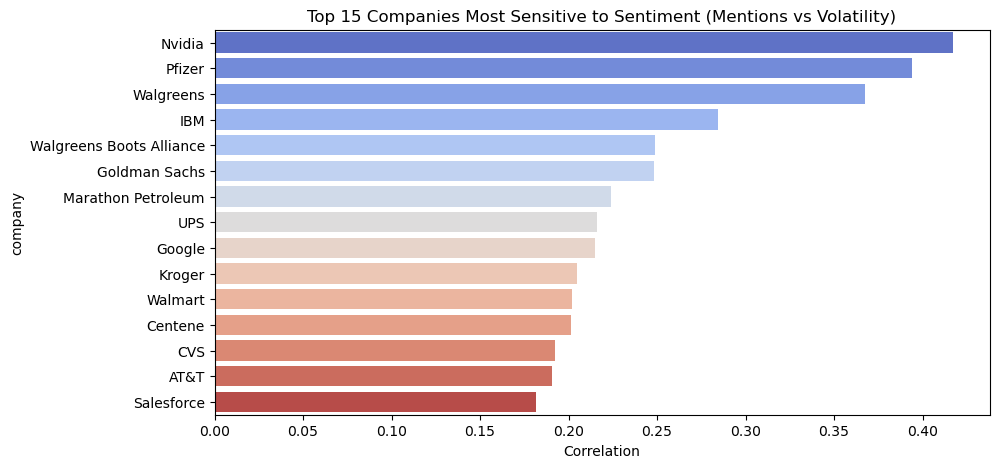

In [266]:
sentiment_sensitivity = (
    combo.groupby("company")[["all_keywords_mentions", "weekly_variance"]]
    .corr().iloc[0::2,-1].reset_index()
)
sentiment_sensitivity.columns = ["company", "drop", "corr_mentions_vol"]
sentiment_sensitivity = sentiment_sensitivity.sort_values("corr_mentions_vol", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=sentiment_sensitivity.head(15), x="corr_mentions_vol", y="company", palette="coolwarm")
plt.title("Top 15 Companies Most Sensitive to Sentiment (Mentions vs Volatility)")
plt.xlabel("Correlation")
plt.show()

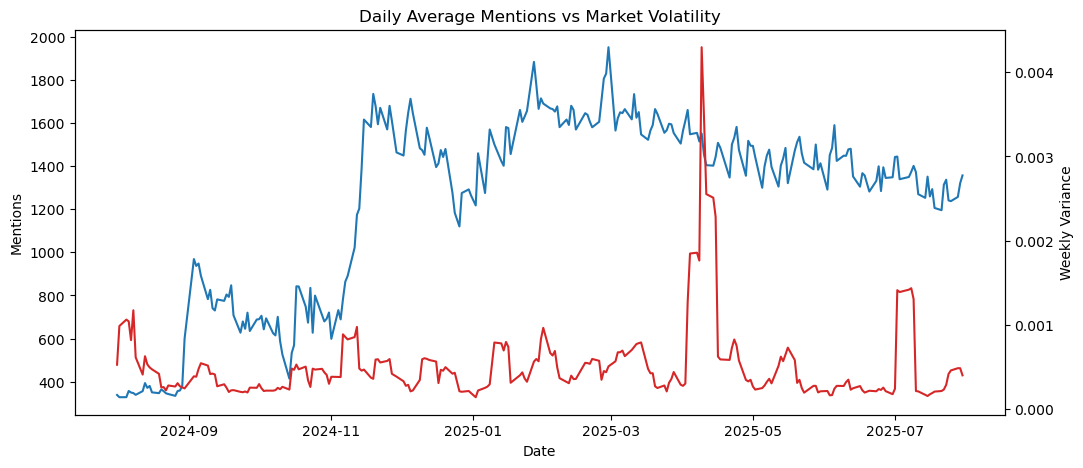

In [267]:
# Average daily mentions & returns (market-level)
daily_trends = (
    combo.groupby("Date")[["all_keywords_mentions", "log_return", "weekly_variance"]]
    .mean()
    .reset_index()
)

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(daily_trends["Date"], daily_trends["all_keywords_mentions"], color="tab:blue", label="Mentions")
ax2 = ax1.twinx()
ax2.plot(daily_trends["Date"], daily_trends["weekly_variance"], color="tab:red", label="Volatility")

ax1.set_title("Daily Average Mentions vs Market Volatility")
ax1.set_xlabel("Date"); ax1.set_ylabel("Mentions"); ax2.set_ylabel("Weekly Variance")
plt.show()


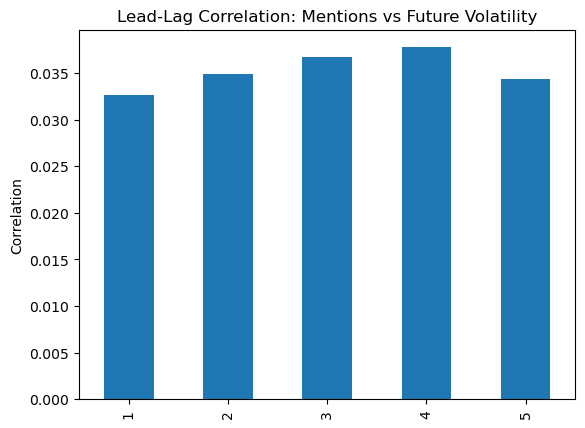

In [268]:
#Lead–Lag Diagnostic
#To see if sentiment leads markets, computing the correlation between sentiment today and 
#returns/volatility after k days

#Interpretation Focus:
#A positive correlation at lead lags (1–3 days) implies predictive sentiment influence.
#If correlations fade quickly, effects are short-lived.

lags = range(1,6)
lead_lag = {}
for lag in lags:
    combo[f"volatility_lead{lag}"] = combo.groupby("company")["weekly_variance"].shift(-lag)
    lead_lag[lag] = combo["all_keywords_mentions"].corr(combo[f"volatility_lead{lag}"])

lead_lag = pd.Series(lead_lag, name="corr")
lead_lag.plot(kind="bar", title="Lead-Lag Correlation: Mentions vs Future Volatility")
plt.ylabel("Correlation")
plt.show()


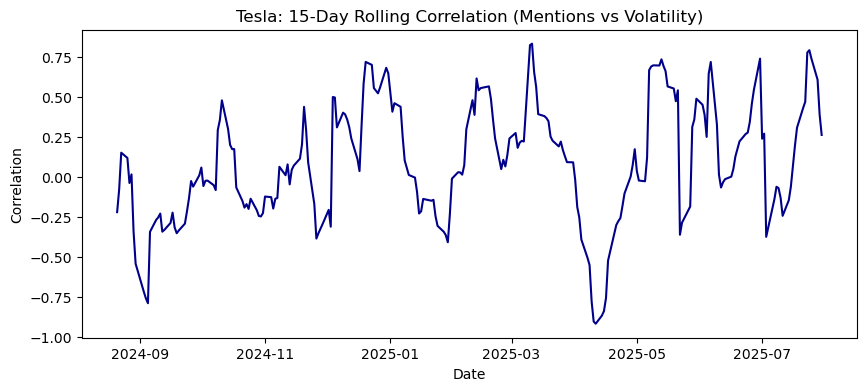

In [269]:
#Does sentiment’s impact strengthen during crises?
#Peaks often occur around earnings announcements, CEO tweets, or macro shocks.
#This visualizes time-varying attention effects, a potential extension for our regression model.

example = "Tesla"
df_ex = combo[combo["company"] == example].sort_values("Date")
df_ex["rolling_corr"] = (
    df_ex["all_keywords_mentions"]
    .rolling(window=15)
    .corr(df_ex["weekly_variance"])
)

plt.figure(figsize=(10,4))
plt.plot(df_ex["Date"], df_ex["rolling_corr"], color="darkblue")
plt.title(f"{example}: 15-Day Rolling Correlation (Mentions vs Volatility)")
plt.ylabel("Correlation")
plt.xlabel("Date")
plt.show()


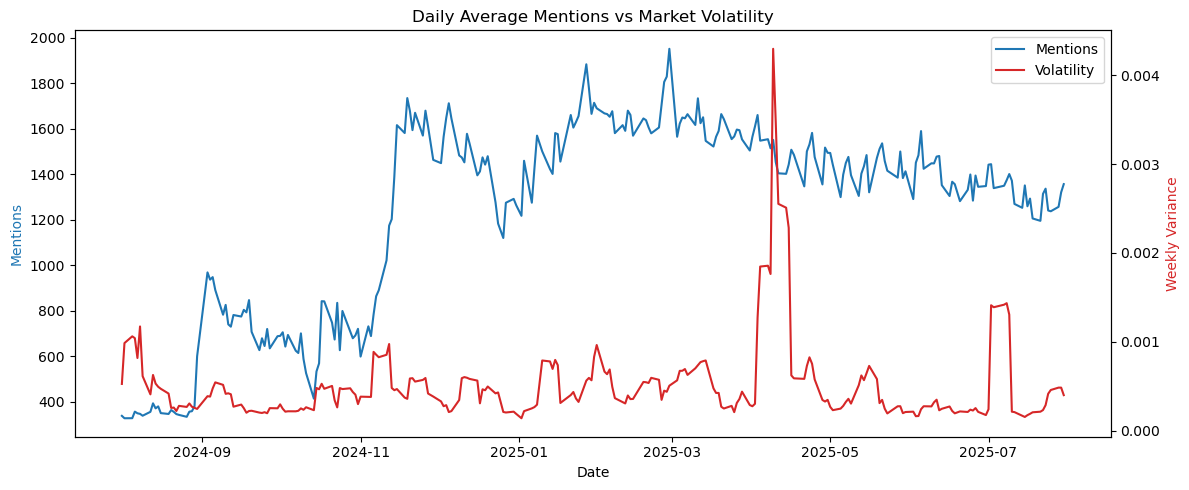

In [205]:
# Average daily mentions & returns (market-level)
daily_trends = (
    combo.groupby("Date")[["all_keywords_mentions", "log_return", "weekly_variance"]]
    .mean()
    .reset_index()
)

fig, ax1 = plt.subplots(figsize=(12,5))

# Plot mentions on left y-axis
lns1 = ax1.plot(
    daily_trends["Date"],
    daily_trends["all_keywords_mentions"],
    color="tab:blue",
    label="Mentions"
)

# Plot volatility on right y-axis
ax2 = ax1.twinx()
lns2 = ax2.plot(
    daily_trends["Date"],
    daily_trends["weekly_variance"],
    color="tab:red",
    label="Volatility"
)

# Combine legends from both axes
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="upper right")

# Labels and title
ax1.set_title("Daily Average Mentions vs Market Volatility")
ax1.set_xlabel("Date")
ax1.set_ylabel("Mentions", color="tab:blue")
ax2.set_ylabel("Weekly Variance", color="tab:red")

plt.tight_layout()
plt.show()
